In [3]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Создаем Spark сессию
spark = SparkSession.builder \
    .appName("JupyterSpark") \
    .master("local[*]") \
    .config("spark.driver.memory", "2g") \
    .config("spark.sql.adaptive.enabled", "true") \
    .getOrCreate()

# Убираем лишние логи
spark.sparkContext.setLogLevel("WARN")

print("Spark в Jupyter Lab готов к работе!")
print(f"Версия Spark: {spark.version}")
print(f"Web UI: http://localhost:4040")

Spark в Jupyter Lab готов к работе!
Версия Spark: 4.0.1
Web UI: http://localhost:4040


In [4]:
# Быстрая проверка что все работает
test_data = [("Python", 1), ("Spark", 2), ("Jupyter", 3)]
df_test = spark.createDataFrame(test_data, ["Technology", "Rank"])
df_test.show()

# Проверка RDD
test_rdd = spark.sparkContext.parallelize([1, 2, 3, 4, 5])
print(f"RDD тест - сумма: {test_rdd.sum()}")

+----------+----+
|Technology|Rank|
+----------+----+
|    Python|   1|
|     Spark|   2|
|   Jupyter|   3|
+----------+----+

RDD тест - сумма: 15


In [5]:
print("ВЫПОЛНЕНИЕ БАЗОВЫХ МЕТОДОВ RDD")

# Создаем тестовые данные
data_rdd = spark.sparkContext.parallelize([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print("Исходные данные:", data_rdd.collect())

ВЫПОЛНЕНИЕ БАЗОВЫХ МЕТОДОВ RDD
Исходные данные: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [6]:
# MAP - преобразование каждого элемента
mapped_rdd = data_rdd.map(lambda x: x * 2)
print("1. MAP (x * 2):", mapped_rdd.collect())

# MAP с более сложной функцией
mapped_complex = data_rdd.map(lambda x: (x, x**2, x**3))
print("   MAP (x, x², x³):", mapped_complex.collect())

1. MAP (x * 2): [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
   MAP (x, x², x³): [(1, 1, 1), (2, 4, 8), (3, 9, 27), (4, 16, 64), (5, 25, 125), (6, 36, 216), (7, 49, 343), (8, 64, 512), (9, 81, 729), (10, 100, 1000)]


In [9]:
# FILTER - фильтрация элементов
filtered_even = data_rdd.filter(lambda x: x % 2 == 0)
print("2.FILTER (четные):", filtered_even.collect())

filtered_gt5 = data_rdd.filter(lambda x: x > 5)
print("FILTER (>5):", filtered_gt5.collect())

filtered_prime = data_rdd.filter(lambda x: x in [2, 3, 5, 7])
print("FILTER (простые числа):", filtered_prime.collect())

2.FILTER (четные): [2, 4, 6, 8, 10]
FILTER (>5): [6, 7, 8, 9, 10]
FILTER (простые числа): [2, 3, 5, 7]


In [10]:
# JOIN - объединение по ключу
employees_rdd = spark.sparkContext.parallelize([
    (1, "Анна"), 
    (2, "Борис"), 
    (3, "Виктор"),
    (4, "Дарья")
])

departments_rdd = spark.sparkContext.parallelize([
    (1, "IT"), 
    (2, "HR"), 
    (3, "IT"),
    (5, "Marketing")
])

# Внутреннее соединение
joined_rdd = employees_rdd.join(departments_rdd)
print("3. JOIN (внутренний):", joined_rdd.collect())

# Левое соединение
left_joined = employees_rdd.leftOuterJoin(departments_rdd)
print("   LEFT JOIN:", left_joined.collect())

3. JOIN (внутренний): [(1, ('Анна', 'IT')), (2, ('Борис', 'HR')), (3, ('Виктор', 'IT'))]
   LEFT JOIN: [(1, ('Анна', 'IT')), (2, ('Борис', 'HR')), (3, ('Виктор', 'IT')), (4, ('Дарья', None))]


In [11]:
# FOLD - агрегация с начальным значением
sum_fold = data_rdd.fold(0, lambda x, y: x + y)
print("4. FOLD (сумма, нач. значение 0):", sum_fold)

product_fold = data_rdd.fold(1, lambda x, y: x * y)
print("   FOLD (произведение, нач. значение 1):", product_fold)

max_fold = data_rdd.fold(0, lambda x, y: x if x > y else y)
print("   FOLD (максимум):", max_fold)

4. FOLD (сумма, нач. значение 0): 55
   FOLD (произведение, нач. значение 1): 3628800
   FOLD (максимум): 10


In [12]:
# SORTBYKEY - сортировка по ключу
unsorted_rdd = spark.sparkContext.parallelize([
    (3, "яблоко"), 
    (1, "банан"), 
    (4, "вишня"), 
    (2, "апельсин")
])

sorted_asc = unsorted_rdd.sortByKey()
print("5. SORTBYKEY (по возрастанию):", sorted_asc.collect())

sorted_desc = unsorted_rdd.sortByKey(ascending=False)
print("   SORTBYKEY (по убыванию):", sorted_desc.collect())

5. SORTBYKEY (по возрастанию): [(1, 'банан'), (2, 'апельсин'), (3, 'яблоко'), (4, 'вишня')]
   SORTBYKEY (по убыванию): [(4, 'вишня'), (3, 'яблоко'), (2, 'апельсин'), (1, 'банан')]


In [13]:
# UNION - объединение RDD
rdd1 = spark.sparkContext.parallelize([1, 2, 3])
rdd2 = spark.sparkContext.parallelize([4, 5, 6])
rdd3 = spark.sparkContext.parallelize([7, 8, 9])

union_rdd = rdd1.union(rdd2).union(rdd3)
print("6. UNION (объединение 3 RDD):", union_rdd.collect())

# UNION с дубликатами
rdd_duplicates = spark.sparkContext.parallelize([1, 2, 2, 3, 3, 3])
union_with_duplicates = rdd1.union(rdd_duplicates)
print("   UNION с дубликатами:", union_with_duplicates.collect())

6. UNION (объединение 3 RDD): [1, 2, 3, 4, 5, 6, 7, 8, 9]
   UNION с дубликатами: [1, 2, 3, 1, 2, 2, 3, 3, 3]


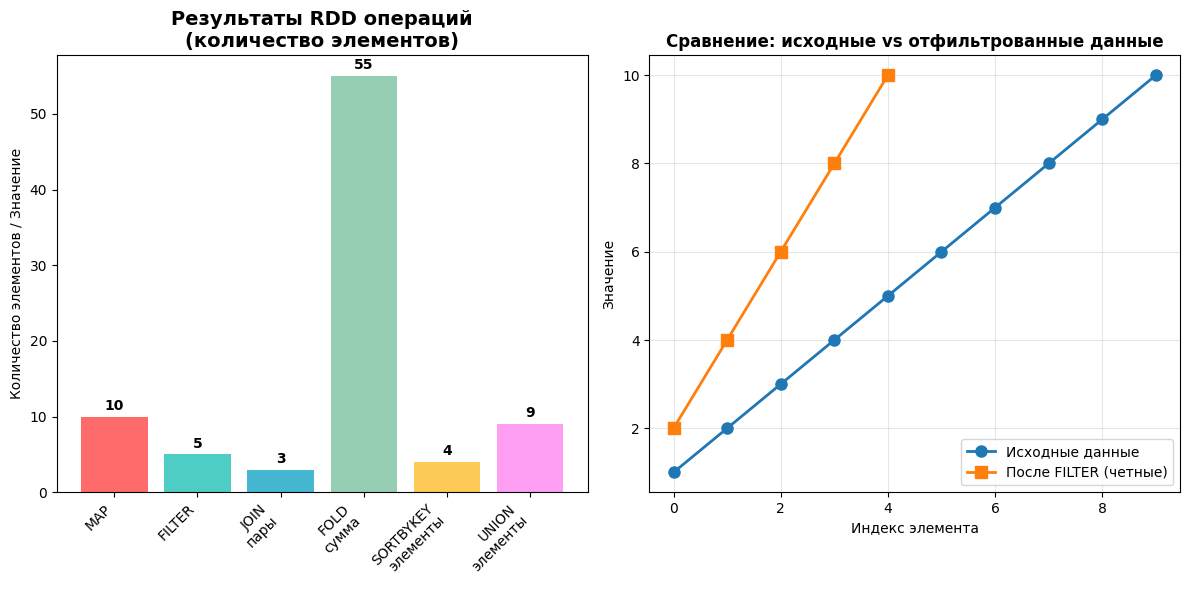

In [14]:
# Визуализация результатов операций
%matplotlib inline

# Подготовка данных для визуализации
operations = ['MAP', 'FILTER', 'JOIN\nпары', 'FOLD\nсумма', 'SORTBYKEY\nэлементы', 'UNION\nэлементы']
results = [
    len(mapped_rdd.collect()),
    len(filtered_even.collect()),
    len(joined_rdd.collect()),
    sum_fold,
    len(sorted_asc.collect()),
    len(union_rdd.collect())
]

# Создаем график
plt.figure(figsize=(12, 6))

# График 1: Количество элементов после операций
plt.subplot(1, 2, 1)
bars = plt.bar(operations, results, color=['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4', '#feca57', '#ff9ff3'])
plt.title('Результаты RDD операций\n(количество элементов)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Количество элементов / Значение')

# Добавляем значения на столбцы
for bar, value in zip(bars, results):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{value}', ha='center', va='bottom', fontweight='bold')

# График 2: Сравнение исходных и отфильтрованных данных
plt.subplot(1, 2, 2)
original_data = data_rdd.collect()
filtered_data = filtered_even.collect()

x_original = range(len(original_data))
x_filtered = range(len(filtered_data))

plt.plot(x_original, original_data, 'o-', label='Исходные данные', linewidth=2, markersize=8)
plt.plot(x_filtered, filtered_data, 's-', label='После FILTER (четные)', linewidth=2, markersize=8)
plt.title('Сравнение: исходные vs отфильтрованные данные', fontsize=12, fontweight='bold')
plt.xlabel('Индекс элемента')
plt.ylabel('Значение')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [15]:
print("КОМБИНИРОВАНИЕ МЕТОДОВ")

# Цепочка преобразований
result_chain = (data_rdd
                .map(lambda x: x * 3)           # Умножить на 3
                .filter(lambda x: x % 2 == 0)   # Оставить четные
                .filter(lambda x: x > 10)       # Оставить больше 10
                .collect())

print("Цепочка: MAP(*3) → FILTER(четные) → FILTER(>10):")
print("Результат:", result_chain)

# Сложная цепочка с числами
complex_result = (spark.sparkContext.parallelize(range(1, 21))
                 .map(lambda x: x * 2)
                 .filter(lambda x: x % 3 == 0)
                 .map(lambda x: (x, x**2))
                 .collect())

print("\nЦепочка с числами 1-20:")
print("MAP(*2) → FILTER(кратные 3) → MAP((x, x²)):")
print("Результат:", complex_result)

КОМБИНИРОВАНИЕ МЕТОДОВ
Цепочка: MAP(*3) → FILTER(четные) → FILTER(>10):
Результат: [12, 18, 24, 30]

Цепочка с числами 1-20:
MAP(*2) → FILTER(кратные 3) → MAP((x, x²)):
Результат: [(6, 36), (12, 144), (18, 324), (24, 576), (30, 900), (36, 1296)]


In [ ]:
3.

In [19]:
print("🔍 ПОПЫТКА ЗАГРУЗКИ РАЗНЫХ ДАТАСЕТОВ")

datasets_to_try = {
    "SensorSampleData": [
        "wasbs:///HdiSamples/HdiSamples/SensorSampleData/sensors.csv",
        "/HdiSamples/HdiSamples/SensorSampleData/sensors.csv",
        "SensorSampleData.csv"
    ],
    "MahoutMovieData": [
        "wasbs:///HdiSamples/HdiSamples/MahoutMovieData/movies.csv",
        "/HdiSamples/HdiSamples/MahoutMovieData/movies.csv", 
        "MahoutMovieData.csv"
    ],
    "StorageAnalytics": [
        "wasbs:///HdiSamples/HdiSamples/StorageAnalytics/log.csv",
        "/HdiSamples/HdiSamples/StorageAnalytics/log.csv",
        "StorageAnalytics.csv"
    ]
}

loaded_df = None
loaded_dataset = None

for dataset_name, paths in datasets_to_try.items():
    print(f"\n🔄 Пробуем загрузить {dataset_name}...")
    for path in paths:
        try:
            df = spark.read.csv(path, header=True, inferSchema=True)
            loaded_df = df
            loaded_dataset = dataset_name
            print(f"УСПЕХ: {dataset_name} загружен из {path}")
            break
        except Exception as e:
            print(f"❌ Не удалось из {path}: {e}")
            continue
    if loaded_df is not None:
        break

if loaded_df is None:
    print("\n❌ Не удалось загрузить ни один датасет через wasbs")
    print("Пробуем загрузить локальные файлы...")
    
    # Попробуем найти локальные файлы
    import os
    local_files = [f for f in os.listdir('.') if f.endswith('.csv')]
    print(f"Найдены локальные CSV файлы: {local_files}")
    
    if local_files:
        try:
            loaded_df = spark.read.csv(local_files[0], header=True, inferSchema=True)
            loaded_dataset = f"Локальный файл: {local_files[0]}"
            print(f"✅ Загружен локальный файл: {local_files[0]}")
        except Exception as e:
            print(f"❌ Ошибка загрузки локального файла: {e}")

🔍 ПОПЫТКА ЗАГРУЗКИ РАЗНЫХ ДАТАСЕТОВ

🔄 Пробуем загрузить SensorSampleData...
❌ Не удалось из wasbs:///HdiSamples/HdiSamples/SensorSampleData/sensors.csv: An error occurred while calling o589.csv.
: java.lang.RuntimeException: java.lang.ClassNotFoundException: Class org.apache.hadoop.fs.azure.NativeAzureFileSystem$Secure not found
	at org.apache.hadoop.conf.Configuration.getClass(Configuration.java:2737)
	at org.apache.hadoop.fs.FileSystem.getFileSystemClass(FileSystem.java:3569)
	at org.apache.hadoop.fs.FileSystem.createFileSystem(FileSystem.java:3612)
	at org.apache.hadoop.fs.FileSystem.access$300(FileSystem.java:172)
	at org.apache.hadoop.fs.FileSystem$Cache.getInternal(FileSystem.java:3716)
	at org.apache.hadoop.fs.FileSystem$Cache.get(FileSystem.java:3667)
	at org.apache.hadoop.fs.FileSystem.get(FileSystem.java:557)
	at org.apache.hadoop.fs.Path.getFileSystem(Path.java:366)
	at org.apache.spark.sql.execution.datasources.DataSource$.$anonfun$checkAndGlobPathIfNecessary$1(DataSource.

25/11/24 16:47:05 WARN FileStreamSink: Assume no metadata directory. Error while looking for metadata directory in the path: wasbs:///HdiSamples/HdiSamples/SensorSampleData/sensors.csv.
java.lang.RuntimeException: java.lang.ClassNotFoundException: Class org.apache.hadoop.fs.azure.NativeAzureFileSystem$Secure not found
	at org.apache.hadoop.conf.Configuration.getClass(Configuration.java:2737)
	at org.apache.hadoop.fs.FileSystem.getFileSystemClass(FileSystem.java:3569)
	at org.apache.hadoop.fs.FileSystem.createFileSystem(FileSystem.java:3612)
	at org.apache.hadoop.fs.FileSystem.access$300(FileSystem.java:172)
	at org.apache.hadoop.fs.FileSystem$Cache.getInternal(FileSystem.java:3716)
	at org.apache.hadoop.fs.FileSystem$Cache.get(FileSystem.java:3667)
	at org.apache.hadoop.fs.FileSystem.get(FileSystem.java:557)
	at org.apache.hadoop.fs.Path.getFileSystem(Path.java:366)
	at org.apache.spark.sql.execution.streaming.FileStreamSink$.hasMetadata(FileStreamSink.scala:55)
	at org.apache.spark.sq